In [1]:
#Import necessary packages

import pandas as pd 
import numpy as np

In [2]:
#Read Excel file into Pandas DataFrame 

boston_housing = pd.read_excel('Boston_Housing.xlsx',sheet_name='Data')


### Features and Data Types

| **Column** | **Data Type** | **Description**                                      |
|------------|---------------|------------------------------------------------------|
| CRIM       | Float         | Per capita crime rate by town.                       |
| ZN         | Float         | Proportion of residential land zoned for lots over 25,000 sq. ft. |
| INDUS      | Float         | Proportion of non-retail business acres per town.     |
| CHAS       | Integer       | Charles River dummy variable (1 if tract bounds river; 0 otherwise). |
| NOX        | Float         | Nitric oxides concentration (parts per 10 million).  |
| RM         | Float         | Average number of rooms per dwelling.                |
| AGE        | Float         | Proportion of owner-occupied units built before 1940.|
| DIS        | Float         | Weighted distances to five Boston employment centers.|
| RAD        | Integer       | Index of accessibility to radial highways.           |
| TAX        | Integer       | Full-value property tax rate per $10,000.            |
| PTRATIO    | Float         | Pupil-teacher ratio by town.                         |
| B          | Float         | 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents. |
| LSTAT      | Float         | Percentage of lower status of the population.        |




In [3]:
boston_housing.head()     #Top 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,NaN,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_housing.shape   #Dimensions of the Dataframe

(506, 14)

## Part B.1
### Highlighting Cell that do not have numbers in the cells (Except: PTRATIO)

In [23]:
#Function to highlight cells yellow with non-float or non-int values 
def float_check_background(cell_value):       

    highlight = 'background-color: yellow;'
    default = ''

    if type(cell_value) in [float,int]:
        return default
    else:
        return highlight
    

#Function to highlight cells yellow with null values  
def check_nan_background(cell_value):
    
    highlight = 'background-color: yellow;'
    default = ''

    if pd.isnull(cell_value) is True:
        return highlight
    else: 
        return default

In [24]:
#Applying the above functions to all columns except PTRATIO

(boston_housing.iloc[:,0:10].style
 .applymap(check_nan_background)
 .applymap(float_check_background))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,nan,3,222
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3,222
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5,311
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311
9,0.170040,12.500000,7.870000,0,0.524000,6.004000,85.900000,6.592100,5,311


## Part B.2
### Highlighting outlier cells in PTRATIO column

In [25]:
#Function to highlight cells yellow with non-numeric and any outlier values

def outliers_background(cell_value):

    highlight = 'background-color: blue;'
    default = ''

    if type(cell_value) in [float,int]:
        if cell_value >= 25 or cell_value <=10:
            return highlight
        else:
            return default
    else:
        return highlight

In [26]:
#Applying the above functions to PTRATIO

(boston_housing.iloc[:,10:11].style
 .applymap(check_nan_background)
 .applymap(float_check_background)
 .applymap(outliers_background))

,PTRATIO
0,15.300000
1,17.800000
2,17.800000
3,18.700000
4,18.700000
5,18.700000
6,15.200000
7,15.200000
8,15.200000
9,15.200000


Work on Cells highlighted in yellow

and index 5, 13, 20, 31, 34, 74, 144, 145,

also correct index 54 

# PART C

### Omitting the unwanted cells from PTRatio & creating a new dataframe

In [27]:
#Omitting the below index rows from the dataframe & creating a new dataframe

df_boston = boston_housing.drop([5,13,20,31,34,74,144,145])

https://www.codegrepper.com/code-examples/python/show+all+rows+in+jupyter+notebook

In [6]:
#Setting display to all rows
pd.set_option('display.max_rows', None)

https://www.machinelearningplus.com/pandas/pandas-reset-index/

In [7]:
#Resetting the index numbers after dropping the above rows
df_boston.reset_index(drop=True,inplace=True)
df_boston

NameError: name 'df_boston' is not defined

### Correcting a decimal error in PTRATIO column

In [30]:
#The below index location cell has a typing error
df_boston.iloc[49,10] 

21.1

In [31]:
#Replacing the cell value to 21.1

df_boston.iloc[49,10] = 21.1
df_boston.iloc[49,10]

21.1

## Replacing outliers with NaN

In [32]:
#Replacing wrong values with NaN in the dataframe

df_boston.replace(['****','*****','Sara',' ','Alina','##','Adam','&&&'],np.nan,inplace=True)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,NaN,3,222,18.7,396.90,5.33,36.2
5,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.5240,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


## Filing NaN values with Median

In [33]:
#Checking a random median value 
median_ptratio = df_boston['PTRATIO'].median()
median_ptratio 

19.1

In [34]:
#Replacing all the NaN values with median 
df_boston.fillna(df_boston.median(),inplace= True)

## Final DataFrame after basic cleaning

In [35]:
#Final DataFrame after cleaning
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,3.1523,3,222,18.7,396.90,5.33,36.2
5,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.5240,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


In [41]:
print(df_boston.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  498.000000  498.000000  498.000000  498.000000  498.000000  498.000000   
mean     3.651257   11.546185   11.050141    0.070281    0.553989    6.290365   
std      8.664478   23.464449    6.710224    0.255877    0.114855    0.704440   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.252775    0.000000    9.690000    0.000000    0.538000    6.210000   
75%      3.695990   12.500000   18.100000    0.000000    0.624000    6.629750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  498.000000  498.000000  498.000000  498.000000  498.000000  498.000000   
mean    68.432932    3.790889    9.634538  409.465863   18.454217  356.866867   
std     28.068926    2.1118

## Part D.2
### Apply linear regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
# Select the relevant columns
X = df_boston[['RM']]  # Independent variable
y = df_boston['MEDV']   # Dependent variable


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize the linear regression model
model = LinearRegression()

In [33]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 47.830557320808666


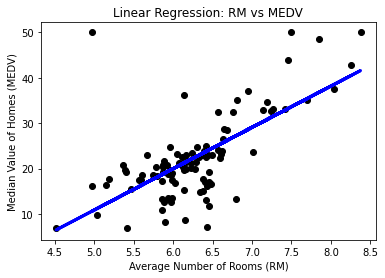

In [53]:
# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Linear Regression: RM vs MEDV')
plt.show()